**Part4**

In [1]:
!pip install numdifftools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 KB 2.4 MB/s eta 0:00:00


In [18]:


import numpy as np
import numpy.linalg as npl

import numdifftools as nd



def projl2ball(x,R):
  norm=npl.norm(x)
  r=R/(max(R,norm))
  s=x
 
  s=s*r
  return s

def projlinfball(x,R):
  s=np.zeros(len(x))
  for i in range(len(x)):
    if x[i] > R :
      s[i]=R
    elif x[i] < -R:
      s[i]=-R
    else:
      s[i]=x[i]
  return np.array(s)


g = lambda x : x[0]**2-x[1]**2
def optim(f,x0,k,tau=0.1):
  s0=x0
  
  grad = nd.Gradient(f)(s0) 
  s1=projlinfball(x0-tau*grad,1)
  L=[]
  for i in range(k):
    l=i
    L.append(f(s0))
    s0=s1
    grad = nd.Gradient(f)(s0)
    s1=projlinfball(s0-tau*grad,1) ##1
    
    
  return f(s1),s1,i,L


def frankwolfelinf(f,x0,k,eps=0.0001):

  s0=x0
  
  grad = nd.Gradient(f)(s0)
  s1=x0+(eps*1.00001)/(npl.norm(s0))*x0
  theta=1
  l=0
  L=[]
  for i in range(k):
    
    l=i
    grad = nd.Gradient(f)(s0)
    t=-np.sign(grad)
    
    
    if np.dot(grad,t-s0) > 0:
      
      return f(s1),L,l
      break
    
    theta=(2/(i+2))
    
    s1=theta*t+(1-theta)*s0
    
    L.append(f(s0))
    
    if npl.norm(s1-s0) < eps:
      
      break
    s0=s1

  return f(s1),s1,l,L








In [10]:
print(frankwolfelinf(g,np.array([0.5,0.7]),20)[3])


[-0.23999999999999994, 0.0, -0.888888888888889, -0.8888888888888888, -0.96, -0.96, -0.9795918367346939, -0.9795918367346939, -0.9876543209876543, -0.9876543209876543, -0.9917355371900827, -0.9917355371900827, -0.9940828402366864, -0.9940828402366864, -0.9955555555555555, -0.9955555555555555, -0.9965397923875432, -0.9965397923875432, -0.997229916897507, -0.997229916897507]


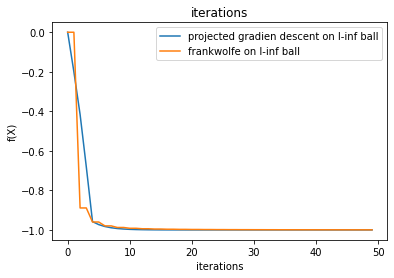

In [22]:

import matplotlib.pyplot as plt
L=frankwolfelinf(g,np.array([0.5,0.5]),50)[3]
l=frankwolfelinf(g,np.array([0.5,0.5]),50)[2]


L1=optim(g,np.array([0.5,0.5]),50)[3]
l1=optim(g,np.array([0.5,0.5]),50)[2]




plt.plot([i for i in range(50)],L1,label='projected gradien descent on l-inf ball')
plt.plot([i for i in range(50)],L,label='frankwolfe on l-inf ball')
plt.xlabel('iterations')
plt.ylabel('f(X)')
plt.title("iterations")
plt.legend()
plt.show()

In [23]:
import numpy.linalg as npl
import numpy as np
import numdifftools as nd
def projsimplex(y):       ## fast projection into the simplex following laurent condat paper
  N=len(y)
  L=np.array([])
  v=np.array([y[0]])
  gho=y[0]-1.
  k=0
  for i in range(1,N):
    
    if y[i] > gho:
      t=len(v)+1
      t=1/t
      gho=gho+t*(y[i]-gho)
      
      
      if gho >y[i]-1:
        
        v=np.append(v,y[i])
        
      else:
        
        L=np.append(L,v)
        
        gho=y[i]-1
  if len(L) > 0:
    
    for i in range(len(L)):
      if L[i] > gho:
        v=np.append(v,[L[i]])
        gho=gho+(1/(len(v)))(L[i]-gho)

  s=len(v)+1
  

  while True:
    
    if s != len(v)  :
        s=len(v)
        k=[]
        l=1
        if len(v) > 0:
            for i in range(len(v)):
              
              if v[i] <= gho:
                k.append(i)
                if len(v) >1:
                  gho=gho+(gho-v[i])/(len(v)-l)
                
                l+=1
          
            
        v=np.delete(v,k)
        
        
      
    else:
      
      break
  tau=gho
  k=npl.norm(v)
  X=np.zeros(N)
  for i in range(N):
    X[i]=max(y[i]-tau,0)
  return X
g = lambda x : x[0]**4+x[1]**2
def optimsimplex(f,x0,k,tau=0.1):
  s0=x0
  
  grad = nd.Gradient(f)(s0) 
  s1=projsimplex(x0-tau*grad)
  L=[]
  for i in range(k):
    l=i
    L.append(f(s0))
    s0=s1
    grad = nd.Gradient(f)(s0)
    s1=projsimplex(s0-tau*grad)
    
    
  return f(s1),s1,i,L
print(optimsimplex(g,[0.5,0.5],100))

(0.289273423937778, array([0.58975451, 0.41024549]), 99, [0.3125, 0.301594140625, 0.2956327613600169, 0.29248714554516864, 0.29087193434457664, 0.29005932608574975, 0.2896565801314206, 0.28945911287161674, 0.2893630351507904, 0.28931654128618167, 0.2892941274030749, 0.2892833507154132, 0.2892781788094411, 0.28927569991400814, 0.2892745128369236, 0.2892739447280665, 0.28927367295990536, 0.28927354299169955, 0.2892734808494756, 0.2892734511413684, 0.28927343694031177, 0.28927343015238843, 0.2892734269079996, 0.2892734253573461, 0.28927342461622885, 0.2892734242620257, 0.2892734240927427, 0.2892734240118386, 0.28927342397317285, 0.2892734239546938, 0.2892734239458623, 0.28927342394164157, 0.2892734239396244, 0.28927342393866046, 0.28927342393819966, 0.2892734239379795, 0.2892734239378743, 0.289273423937824, 0.2892734239377999, 0.2892734239377885, 0.28927342393778294, 0.2892734239377803, 0.28927342393777905, 0.2892734239377785, 0.2892734239377782, 0.28927342393777805, 0.289273423937778, 0.

[4 5]


In [24]:
def frankwolfesimplex(f,x0,k):

  s0=x0
  

  l=0
  L=[]
  for i in range(k):
    
    l=i
    grad = nd.Gradient(f)(s0)
    t=np.zeros(len(grad))
    t[np.argmin(grad)]=1
  
    
    
    if np.dot(grad,t-s0) > 0:
      print('passe par la ')
      return f(s1),L,l
      break
    
    theta=(2/(i+2))
    
    s1=theta*t+(1-theta)*s0
    
    L.append(f(s0))
    
    
    s0=s1

  return f(s1),s1,l,L


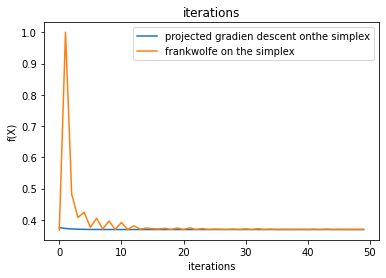

In [29]:

g = lambda x : x[0]**3+x[1]**2
L=frankwolfesimplex(g,np.array([0.49,0.5]),50)[3]



L1=optimsimplex(g,np.array([0.5,0.5]),50)[3]





plt.plot([i for i in range(50)],L1,label='projected gradien descent onthe simplex')
plt.plot([i for i in range(50)],L,label='frankwolfe on the simplex')
plt.xlabel('iterations')
plt.ylabel('f(X)')
plt.title("iterations")
plt.legend()
plt.show()